In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import mpl_finance as mpf

import os
from tiingo import TiingoClient

config = {}
config['session'] = True
config['api_key'] = os.environ['TIINGO_API_KEY']

client = TiingoClient(config)

def get_df_from_tiingo(symbol, start, end):
    df = pd.DataFrame(client.get_ticker_price(symbol,
                      startDate=start,
                      endDate=end,
                      frequency='daily'
                     ))
    df['date'] = pd.to_datetime(df['date']).dt.date
    df.set_index('date', inplace=True)
    del df.index.name
    return df

In [2]:
symbol = 'AAPL'
start = '2017-01-01'
end = '2018-01-01'
prices = get_df_from_tiingo(symbol, start, end)

prices = prices.loc[:, ['adjClose', 'adjHigh', 'adjLow', 'adjOpen']]

In [3]:
prices

,adjClose,adjHigh,adjLow,adjOpen
2017-01-03,111.697374,111.870473,110.360659,111.360791
2017-01-04,111.572357,112.043573,111.312708,111.408874
2017-01-05,112.139739,112.384195,111.370408,111.476191
2017-01-06,113.389904,113.630320,112.005106,112.303223
2017-01-09,114.428502,114.851634,113.418754,113.428370
2017-01-10,114.543902,114.803551,113.764953,114.216936
2017-01-11,115.159367,115.332467,114.053453,114.188086
2017-01-12,114.678535,114.726618,113.678403,114.337144
2017-01-13,114.476585,115.034351,114.255402,114.543902
2017-01-17,115.399783,115.630583,113.688020,113.803420


In [4]:
def get_tr_and_atr(index, start, end, closes, highs, lows, window=14):
    s_tr = pd.Series()
    s_atr = pd.Series()
    
    start = pd.to_datetime(start).date()
    end = pd.to_datetime(end).date()
    first_index = index[0]
    last_index = index[len(index) - 1]
    start = first_index if first_index > start else start
    end = last_index if last_index < end else end
    
    start_loc = index.get_loc(start)
    end_loc = index.get_loc(end)
    
    def get_tr(cur, prev):
        if prev != None:
            return max(
                    cur['high'] - cur['low'],
                    abs(cur['high'] - prev['close']),
                    abs(cur['low'] - prev['close'])
            )
        else:
            return cur['high'] - cur['low']
    
    range_start = start_loc - window if (start_loc - window) > 0 else 0
    
    prev_row = None
    prev_atr = None
    for i in range(range_start, end_loc):
        date_idx = index[i]
        cur_row = { 'high': highs.iloc[i], 'low': lows.iloc[i], 'close': closes.iloc[i] }

        tr = get_tr(cur_row, prev_row)
        s_tr[date_idx] = tr

        atr = None
        if i < (window - 1):
            pass
        elif i == (window - 1):
            atr = s_tr.iloc[range_start: range_start + window + 1].mean()
        elif i > (window - 1):
            atr = ((prev_atr * (window - 1)) + tr) / window
        
        s_atr[date_idx] = atr

        prev_row = cur_row
        prev_atr = atr
    
    return s_tr.loc[start: end], s_atr.loc[start: end]

In [5]:
tr, atr = get_tr_and_atr(
    prices.index,
    start=start,
    end=end,
    closes=prices['adjClose'],
    highs=prices['adjHigh'],
    lows=prices['adjLow']
)

prices['TR'] = tr
prices['ATR'] = atr

In [6]:
prices

,adjClose,adjHigh,adjLow,adjOpen,TR,ATR
2017-01-03,111.697374,111.870473,110.360659,111.360791,1.509814,None
2017-01-04,111.572357,112.043573,111.312708,111.408874,0.730865,None
2017-01-05,112.139739,112.384195,111.370408,111.476191,1.013787,None
2017-01-06,113.389904,113.630320,112.005106,112.303223,1.625214,None
2017-01-09,114.428502,114.851634,113.418754,113.428370,1.461731,None
2017-01-10,114.543902,114.803551,113.764953,114.216936,1.038598,None
2017-01-11,115.159367,115.332467,114.053453,114.188086,1.279014,None
2017-01-12,114.678535,114.726618,113.678403,114.337144,1.480964,None
2017-01-13,114.476585,115.034351,114.255402,114.543902,0.778949,None
2017-01-17,115.399783,115.630583,113.688020,113.803420,1.942563,None


In [7]:
def plt_candlestick_from_df(df, date_format='%Y-%m-%d', date_step=30):
    quotes = []
    for row in df.itertuples():
        quotes.append((matplotlib.dates.date2num(row.Index), row.adjOpen, row.adjClose, row.adjHigh, row.adjLow))
        
    fig, ax = plt.subplots()
    mpf.candlestick2_ochl(
        ax,
        opens=df['adjOpen'],
        closes=df['adjClose'],
        highs=df['adjHigh'],
        lows=df['adjLow'],
        width=0.5,
        alpha=1,
        colorup='green',
        colordown='red'
    );

    def x_ticker_formatter(x, pos):
        label = ''
        try:
            label = df.index[int(x)]
        except IndexError:
            label = ''
        return label

    ax.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(x_ticker_formatter))
    
    xtick0 = (5 - df.index[0].weekday()) % 5
    plt.xticks(range(xtick0, len(df), date_step), [x.strftime(date_format) for x in df.index][xtick0::date_step])
    
    return fig, ax

/home/hanai/.pyenv/versions/py373/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


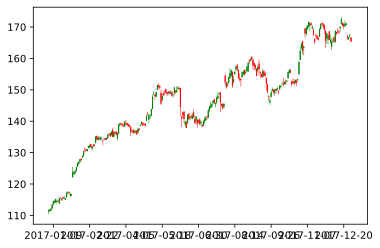

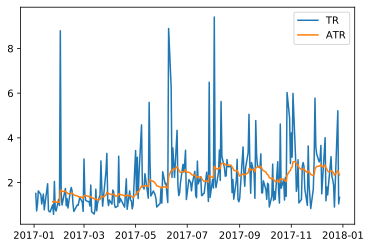

In [8]:
fig, ax = plt_candlestick_from_df(prices)

plt.subplots()
plt.plot(prices.TR)
plt.plot(prices.ATR)
plt.legend(['TR', 'ATR']);